In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
#visualization
import seaborn as sns 
import metaplot as plot
import matplotlib.pyplot as plt
data = pd.read_csv("../data/CELSIUS_TO_FAHRENHEIT.csv")

2024-11-02 15:35:39.189337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 15:35:39.192273: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 15:35:39.201121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 15:35:39.215286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 15:35:39.219668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 15:35:39.230612: I tensorflow/core/platform/cpu_feature_gu

In [43]:
print("MSES")

MSES


In [3]:
print("MSES")

MSES


In [67]:
data.head
data

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0
...,...,...
15995,833,1531.4
15996,757,1394.6
15997,1584,2883.2
15998,2396,4344.8


In [3]:
tf.__version__

'2.17.0'

In [4]:
data.tail(20)

,Celsius,Fahrenheit
15980,1428,2602.4
15981,2122,3851.6
15982,941,1725.8
15983,1559,2838.2
15984,1480,2696.0
15985,613,1135.4
15986,2141,3885.8
15987,1114,2037.2
15988,1753,3187.4
15989,163,325.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


In [6]:
data.describe()

,Celsius,Fahrenheit
count,16000.000000,16000.000000
mean,1254.736062,2290.524912
std,726.338268,1307.408882
min,0.000000,32.000000
25%,627.750000,1161.950000
50%,1265.000000,2309.000000
75%,1891.000000,3435.800000
max,2500.000000,4532.000000


<AxesSubplot: xlabel='Celsius', ylabel='Fahrenheit'>

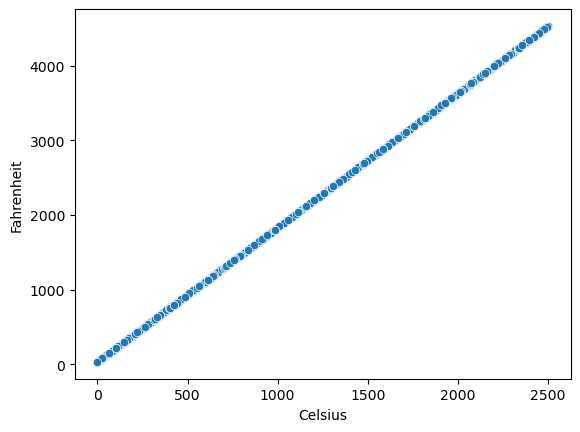

In [7]:
#visuliazação de dados
sns.scatterplot(x =data['Celsius'] , y=data['Fahrenheit'])

In [8]:
#configuração da base de treinamento
ytrain = data['Fahrenheit']
xtrain = data['Celsius']

In [9]:
ytrain.shape

(16000,)

In [10]:
xtrain.shape

(16000,)

In [20]:
model = tf.keras.Sequential()
#input_shape represent the input
#units represents the output
model.add(tf.keras.layers.Dense(units=10 , input_shape = [1]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
#this Param equivalent to baias and Wn..


/home/jsn/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:


model.compile(tf.keras.optimizers.Adam(0.1) , loss= 'mean_squared_error')

In [22]:
#epochs  reference to numbers of time to each trainning
numberTrainning = model.fit(xtrain, ytrain, epochs=1000)

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - loss: 271146.4062
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 131.9387
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 45.9576
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 8.4856
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 1.0170
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.2594
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 344.9602
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 70.9423
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 284.6160
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 132.5831
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 64.8918
Epoch 12/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.0037
Epoch 13/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 236.6480
Epoch 14/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/ste

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 1.4770e-04
Epoch 78/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 746.1793
Epoch 79/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.2115
Epoch 80/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.0014
Epoch 81/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 2.0925e-04
Epoch 82/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 655.4752
Epoch 83/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.0020
Epoch 84/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 98.4647
Epoch 85/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 368.0717
Epoch 86/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.1282    
Epoch 87/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 118566.6250
Epoch 88/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 10.6419
Epoch 89/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 4.1143
Epoch 90/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/s

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 1096.9307
Epoch 153/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.0581
Epoch 154/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.0032   
Epoch 155/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 620.6797
Epoch 156/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 553.5231
Epoch 157/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 2391.2402
Epoch 158/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 204.4614
Epoch 159/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 2.6268
Epoch 160/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.3433
Epoch 161/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.0221
Epoch 162/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0025
Epoch 163/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 102.4045
Epoch 164/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.1918
Epoch 165/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 54

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.0062
Epoch 228/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 6.2456e-04
Epoch 229/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 3.8519e-05
Epoch 230/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 1.5644e-06
Epoch 231/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 8.3010e-04
Epoch 232/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 230.4817
Epoch 233/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 364.2457
Epoch 234/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 47.8044
Epoch 235/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.5060
Epoch 236/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 94.5702
Epoch 237/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 5.3149
Epoch 238/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 593.8625
Epoch 239/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 20.6718
Epoch 240/1000
500/500 ━━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0793
Epoch 303/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 63.8665
Epoch 304/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 15.6163
Epoch 305/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 338.5469
Epoch 306/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0289
Epoch 307/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.0462   
Epoch 308/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 16847.8965
Epoch 309/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 1.2451
Epoch 310/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.1082
Epoch 311/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.0049
Epoch 312/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 14.3121
Epoch 313/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 3450.5769
Epoch 314/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.1940
Epoch 315/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532u

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 594.5192
Epoch 378/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1208.8076
Epoch 379/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 4.3736
Epoch 380/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 1.1044
Epoch 381/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 905.7526
Epoch 382/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 54.5780
Epoch 383/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 3476.4265
Epoch 384/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0014
Epoch 385/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 207.2401
Epoch 386/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.0559
Epoch 387/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 433.5626
Epoch 388/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 4.5221
Epoch 389/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 12861.7188
Epoch 390/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0031
Epoch 453/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 1.1570e-04
Epoch 454/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 1.5820e-06
Epoch 455/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 4.1160e-07
Epoch 456/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 201.1637
Epoch 457/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 9.1304
Epoch 458/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 2.6594e-05
Epoch 459/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 8.5128e-07
Epoch 460/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 109.7613
Epoch 461/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 1156.7015
Epoch 462/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 113.3693
Epoch 463/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.8125
Epoch 464/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0810
Epoch 465/1000
500/500 ━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 122.7369
Epoch 528/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 410.9769
Epoch 529/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 318.0325
Epoch 530/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 48.0764
Epoch 531/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 21.3354
Epoch 532/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 2355.6941
Epoch 533/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 9.5862e-04
Epoch 534/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 5.4142e-06
Epoch 535/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 257.9622
Epoch 536/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 1799.7140
Epoch 537/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 1.7622
Epoch 538/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 5.4450e-05
Epoch 539/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 4.7521e-06
Epoch 540/1000
500/500 ━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.0018
Epoch 603/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 369.4680
Epoch 604/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.1340
Epoch 605/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 26.2086
Epoch 606/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 663.0998
Epoch 607/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.0501
Epoch 608/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 6.2991
Epoch 609/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 309.9198
Epoch 610/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 330.4521
Epoch 611/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 3.0959
Epoch 612/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 109.0686
Epoch 613/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.0181
Epoch 614/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 6685.4194
Epoch 615/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 577us

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 105.5589
Epoch 678/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 1.7489
Epoch 679/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 194107.2500
Epoch 680/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 10.2973
Epoch 681/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 23.4694
Epoch 682/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 13559.0400
Epoch 683/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 1.7041
Epoch 684/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3398
Epoch 685/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.0532
Epoch 686/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.0045
Epoch 687/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 3.8467e-04
Epoch 688/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 3636.1040
Epoch 689/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 1.2726
Epoch 690/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3255
Epoch 753/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 297.8218
Epoch 754/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 202.6865
Epoch 755/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0500
Epoch 756/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.0012    
Epoch 757/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 559.2700
Epoch 758/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 65.2240
Epoch 759/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.2341
Epoch 760/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 54700.1719
Epoch 761/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 386.2898
Epoch 762/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 64.6725
Epoch 763/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 5.1251
Epoch 764/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.0931
Epoch 765/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 5

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 1.5045e-04
Epoch 828/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 1.2820e-06
Epoch 829/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 4.0538e-07
Epoch 830/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 123.5105
Epoch 831/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.0032
Epoch 832/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 164.3371
Epoch 833/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 2.9644e-05
Epoch 834/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.1655    
Epoch 835/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 859.9335
Epoch 836/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 169.9586
Epoch 837/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 2.1840e-07
Epoch 838/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 3.3664e-07
Epoch 839/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 1.2490e-06
Epoch 840/1000
500/500 ━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 2.7245e-05
Epoch 903/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 4.8513e-05
Epoch 904/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 22356.2949
Epoch 905/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.3969
Epoch 906/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0622
Epoch 907/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.0053
Epoch 908/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 2.1704e-04
Epoch 909/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 3.8097e-06
Epoch 910/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 3.7847e-07
Epoch 911/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 3.9372e-07
Epoch 912/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 5.1690e-05
Epoch 913/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 355.5872
Epoch 914/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 41.9652 
Epoch 915/1000
500/500 ━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.9105
Epoch 978/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.0685
Epoch 979/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.0024
Epoch 980/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 3.9302e-05
Epoch 981/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 3.4356e-07
Epoch 982/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 2.2658e-07
Epoch 983/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 2.8136e-07
Epoch 984/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 4.8772e-05
Epoch 985/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 365.4934
Epoch 986/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 3.0632e-05
Epoch 987/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 4.0148e-06
Epoch 988/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 249.0395
Epoch 989/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.0644
Epoch 990/1000
500/500 ━━━━━━━━━━━

In [23]:
#avaliação do modelo

treinamentoHistorico =model.fit(xtrain , ytrain , epochs=500)



Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 2.8904e-05
Epoch 2/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 356.2740
Epoch 3/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.0041
Epoch 4/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 1.1365e-04
Epoch 5/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 98.3676
Epoch 6/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 5434.5537
Epoch 7/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.0224
Epoch 8/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 1.2415e-04
Epoch 9/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 3.6294e-07
Epoch 10/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 2.1504e-07
Epoch 11/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 8.0575e-07
Epoch 12/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 1.1595e-05
Epoch 13/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 1202.2633
Epoch 14/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 564u

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 2.3924e-06
Epoch 78/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 5.4347e-06
Epoch 79/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 163.6105
Epoch 80/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 2095.8086
Epoch 81/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.0054
Epoch 82/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 6.0160e-07
Epoch 83/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 4.0449e-06
Epoch 84/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 580.5750
Epoch 85/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 19.7624
Epoch 86/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 320.2191
Epoch 87/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 44.9149
Epoch 88/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 53.0592
Epoch 89/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 354364.0000
Epoch 90/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step -

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 4.4581e-05
Epoch 153/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 603.3759
Epoch 154/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 1.6254e-05
Epoch 155/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 154.6388
Epoch 156/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 3565.5742
Epoch 157/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 1.1396e-06
Epoch 158/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 3.1058e-07
Epoch 159/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 1.7770e-05
Epoch 160/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 171.5451
Epoch 161/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 4073.8679
Epoch 162/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 1114.2168
Epoch 163/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 9.8339 
Epoch 164/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.1671
Epoch 165/500
500/500 ━━━━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 11.2790  
Epoch 228/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 252.5238
Epoch 229/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.7094   
Epoch 230/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 1680.7717
Epoch 231/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 4.1538    
Epoch 232/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 882.9400
Epoch 233/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 8.4327e-06
Epoch 234/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 23535.4238
Epoch 235/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 46.5395
Epoch 236/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 3.2881
Epoch 237/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.0993
Epoch 238/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.0017
Epoch 239/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.0021
Epoch 240/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 832.7413
Epoch 303/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 7939.5737
Epoch 304/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 5.4667
Epoch 305/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.6105
Epoch 306/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0417
Epoch 307/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 9.7741e-04
Epoch 308/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 9.2948e-06
Epoch 309/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 3.9140e-07
Epoch 310/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 7.0658e-07
Epoch 311/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 4.8082e-05
Epoch 312/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 199.2733
Epoch 313/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0111
Epoch 314/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 1205.2324
Epoch 315/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 57

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 72.6788
Epoch 378/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 6.2598e-04
Epoch 379/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 419.0115
Epoch 380/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 3.8755e-05
Epoch 381/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 336.7241
Epoch 382/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 12.0507  
Epoch 383/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 526.3954
Epoch 384/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 5662.3921
Epoch 385/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 34.8735
Epoch 386/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.1471
Epoch 387/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.0232
Epoch 388/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 73.1756
Epoch 389/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 722.3293
Epoch 390/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/s

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 3.4876e-07
Epoch 453/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 2.3928e-06
Epoch 454/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 246.1362
Epoch 455/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0034
Epoch 456/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 43.5728
Epoch 457/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 55.7621
Epoch 458/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 50.4882
Epoch 459/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 9.2289e-07
Epoch 460/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 28.9812
Epoch 461/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 135631.6562
Epoch 462/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 16.4314
Epoch 463/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 1.5428
Epoch 464/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.0670
Epoch 465/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/st

In [24]:
treinamentoHistorico.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'trainamento com erro')

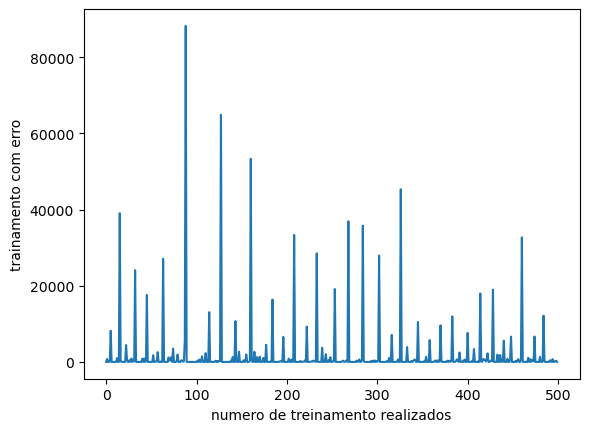

In [30]:
plt.plot(treinamentoHistorico.history['loss'])
plt.xlabel('numero de treinamento realizados')
plt.ylabel('trainamento com erro')

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


[array([[-0.01364218, -0.00205348,  0.00948077,  0.00203109, -0.00561846,
          0.01079777,  0.01487703, -0.00276057,  1.3441612 , -0.00586874]],
       dtype=float32),
 array([ 25.775545 ,   3.8773298, -18.144655 ,  -3.7427638,   9.976813 ,
        -19.303532 , -24.85571  ,   1.8989964,  -0.847609 ,  10.525271 ],
       dtype=float32),
 array([[-0.01822649],
        [-0.00271631],
        [ 0.01346256],
        [ 0.0031447 ],
        [-0.00700385],
        [ 0.01468066],
        [ 0.00275849],
        [-0.002096  ],
        [ 1.3385624 ],
        [-0.00869835]], dtype=float32),
 array([34.385628], dtype=float32)]

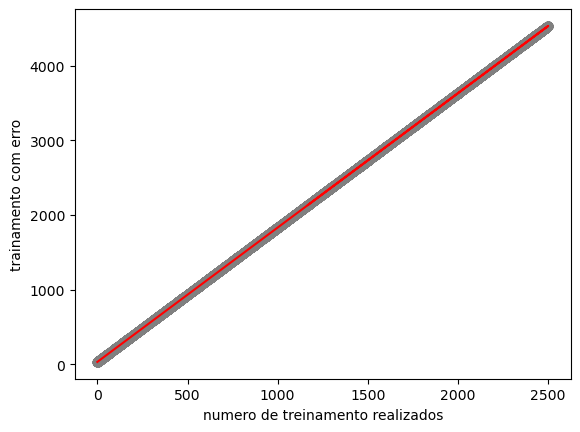

In [32]:
plt.scatter(xtrain , ytrain , color ='gray')
plt.plot(xtrain, model.predict(xtrain), color ='red')
plt.xlabel('numero de treinamento realizados')
plt.ylabel('trainamento com erro')

model.get_weights()
#os dois parametros localizados

In [33]:
#teste
temp_c = 0 
temp_f = model.predict(np.array([[temp_c]]))
temp_f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[31.997316]], dtype=float32)